In [11]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../final_parsed_malt_data_cleaned .csv')
df


,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,vince huguet,No profile image,Webdesigner,-,499,1.00,1h,['Webdesigner'],['Design'],0,...,Je vous dis bonjour.,0,0,0,vincehuguet,https://www.malt.fr/profile/vincehuguet,2013-02-26,Paris,île-de-france,2013-02-26
1,Stanislas Blaineau,https://dam.malt.com/fgvxeyh2zekvtqqrfbis?grav...,développeur php symphony 2/3/4 - full stack,8-15,400,0.91,4h,"['Développeur Web Back-end', 'Développeur Web ...","['symfony 2/3/4', 'MySQL', 'jQuery', 'Bootstra...",0,...,"Développeur web full-stack PHP depuis 2012, j'...",2,0,0,stanislasblaineau,https://www.malt.fr/profile/stanislasblaineau,2013-09-23,Lyon,auvergne-rhône-alpes,2013-09-23
2,Laura Ferron,https://dam.malt.com/rhqcv7lqrx2p8ujw2bok?grav...,Product designer Senior - UX / UI - Figma,8-15,400,1.00,1h,"['UI Designer', 'UX Designer']","[""design d'interface mobile"", 'Webdesign', 'Us...",1,...,Besoin d'une aide graphique pour un nouveau pr...,18,0,0,lauraferron,https://www.malt.fr/profile/lauraferron,2014-01-18,Paris,île-de-france,2014-01-18
3,Loïc B.,No profile image,DA Web / Chef de projets,-,300,1.00,1h,['Product Manager'],"['E-commerce', 'Wordpress', 'Prestashop', 'Ado...",0,...,Après plusieurs années en agence ( création de...,0,0,0,loicbel,https://www.malt.fr/profile/loicbel,2013-05-22,Toulouse,occitanie,2013-05-22
4,Philippe De Cuzey,https://dam.malt.com/vbjgjtuddc6dxgbk28qj?grav...,data engineer senior,8-15,750,0.50,2h,['Data Engineer'],"['Python', 'Spark', 'SQL', 'noSQL', 'Apache Ka...",0,...,"free lance data engineer, working on Big Data ...",1,0,0,philippedecuzey,https://www.malt.fr/profile/philippedecuzey,2014-01-16,Paris,île-de-france,2014-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178925,Caroline Aubry,https://dam.malt.com/8164ce22-8e98-4d6c-ab00-6...,Designer graphique - Websigner - Graphiste print,15et+,350,1.00,1h,"['Graphiste', 'UX Designer', 'Webdesigner']","['Adobe Photoshop', 'Adobe Illustrator', 'Desi...",0,...,"Designer graphique depuis plus de 15 ans, j'ex...",0,0,0,carolineaubry1,https://www.malt.fr/profile/carolineaubry1,2023-10-23,Lorient,bretagne,2023-10-23
178926,Catarina Marques,https://dam.malt.com/988d7dea-cf3c-4da0-b692-3...,Community manager,0-2,400,1.00,1h,['Community Manager'],"['Community management', 'Réseaux sociaux', 'C...",0,...,NaN,0,0,0,catarinamarques,https://www.malt.fr/profile/catarinamarques,2023-10-25,Houdan,île-de-france,2023-10-25
178927,Samy S.,https://dam.malt.com/24f73853-3e80-4972-a952-f...,Développeur Web,0-2,150,1.00,24h,"['Développeur CMS', 'Développeur Web Back-end'...","['HTML5', 'CSS3', 'Bubble.io', 'JavaScript', '...",0,...,"Développeur web full stack de formation, je ma...",0,0,0,samysebahi,https://www.malt.fr/profile/samysebahi,2023-10-15,Paris,île-de-france,2023-10-15
178928,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,...,Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01,Lille,hauts-de-france,2023-11-01


# Top 5 Highest Paid Regions by Average

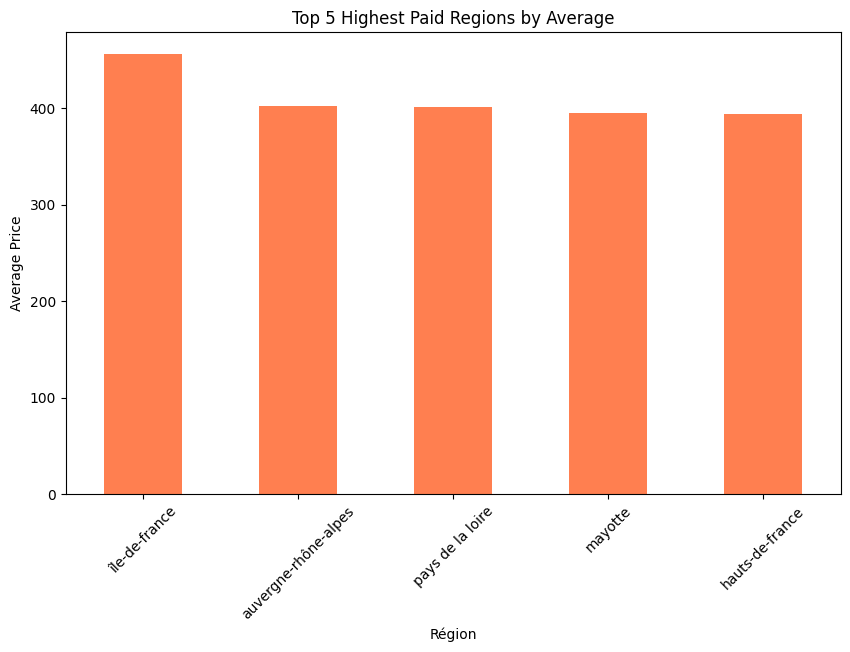

In [17]:
# Group by region and calculate price averaging
region_mean = df.groupby('Region_Name')['price'].mean().sort_values(ascending=False)

# Select the top 5 regions
top_5_regions = region_mean.head(5)


plt.figure(figsize=(10, 6))
top_5_regions.plot(kind='bar', color='coral')
plt.title('Top 5 Highest Paid Regions by Average')
plt.xlabel('Région')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Function to process experience values
def process_experience(value):
    if pd.isnull(value) or value == '-':
        return np.nan
    try:
        # Check if the value is a range
        if '-' in value:
            low, high = value.split('-')
            return (float(low) + float(high)) / 2
        # Check if the value ends with 'et+' which indicates a minimum value
        elif value.endswith('et+'):
            return float(value.rstrip('et+'))
        # Otherwise, convert the value to float directly
        else:
            return float(value)
    except ValueError:
        return np.nan

# Load the dataset
file_path = '../../final_parsed_malt_data_cleaned .csv'
df = pd.read_csv(file_path)

# Apply the function to the 'experience' column
df['experience'] = df['experience'].apply(process_experience)

# Convert 'missions' and 'supermalter' to numeric types
df['missions'] = pd.to_numeric(df['missions'], errors='coerce')
df['supermalter'] = pd.to_numeric(df['supermalter'], errors='coerce')

# Group by 'Region_Name' and calculate the required metrics
missions_by_region = df.groupby('Region_Name')['missions'].sum()
experience_by_region = df.groupby('Region_Name')['experience'].mean()
supermalters_by_region = df.groupby('Region_Name')['supermalter'].sum()

# Combine the metrics into a single DataFrame
comparison_df = pd.DataFrame({
    'Missions': missions_by_region,
    'Experience': experience_by_region,
    'Supermalters': supermalters_by_region
}).reset_index()

# Normalize the metrics to use in the radar chart
normalized_df = comparison_df.drop('Region_Name', axis=1).apply(lambda x: x / x.max(), axis=0)

# The plot is made circular, so we need to complete the loop
normalized_df = pd.concat([normalized_df, normalized_df.iloc[:, 0:1]], axis=1)

# Number of variables we're plotting
num_vars = len(normalized_df.columns)

# Split the circle into even parts and save the angles so we know where to put each axis
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
labels = comparison_df.columns.drop('Region_Name').tolist()
labels += labels[:1]  # Ensure the labels complete the loop
ax.set_thetagrids(np.degrees(angles), labels)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=7)
plt.ylim(0, 1)

# Plot each region's values on the radar chart
for idx, row in comparison_df.iterrows():
    data = row.drop('Region_Name').tolist()
    data += data[:1]  # Complete the loop
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=row['Region_Name'])

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


ValueError: could not convert string to float: ''